### Prerequisites 
*   Package imports
*   Data imports

In [ ]:
# Imports

from google.colab import drive
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Import dataset from Google Drive
drive.mount('/content/drive')

column_names = pd.read_csv('/content/drive/MyDrive/Fault_Column_Names.txt', header=None)
column_names = list(column_names[0])

steel = pd.read_csv('/content/drive/MyDrive/Fault_Variables_dataset.csv', sep='\t', names=column_names)

Mounted at /content/drive


In [ ]:
# Extract label columns
label_cols = column_names[27:]

print('Dataset shape:', steel.shape)
print('Target labels:', label_cols)

# Convert one-hot encoding to target column
steel['Class'] = steel[label_cols].idxmax(1)
steel.drop(columns = label_cols, inplace=True)

print('Dataset shape:', steel.shape)

steel.head(15)


Dataset shape: (1941, 34)
Target labels: ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
Dataset shape: (1941, 28)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry
5,430,441,100250,100337,630,20,87,62357,64,127,...,0.5500,1.0000,1.0,2.7993,1.0414,1.9395,0.8736,-0.2267,0.9874,Pastry
6,413,446,138468,138883,9052,230,432,1481991,23,199,...,0.1435,0.9607,1.0,3.9567,1.5185,2.6181,0.9205,0.2791,1.0000,Pastry
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.9091,1.0000,1.0,2.1206,1.0000,1.3010,0.5000,0.1841,0.3359,Pastry
8,330,343,429227,429253,264,15,26,29748,53,148,...,0.8667,1.0000,1.0,2.4216,1.1139,1.4150,0.5000,-0.1197,0.5593,Pastry
9,74,90,779144,779308,1506,46,167,180215,53,143,...,0.3478,0.9820,1.0,3.1778,1.2041,2.2148,0.9024,-0.0651,1.0000,Pastry


### EDA


*   Initial checks
*   Distribution 

*   Visualizations





In [ ]:
# Check if any nulls are present
print('Nulls present:', steel.isnull().values.any(),'\n')

# Print dataset info
print(steel.info() )


Nulls present: False 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-n

In [ ]:
# Check distribution of target variables 
class_dist = steel['Class'].value_counts(normalize=True)
print(class_dist)

Other_Faults    0.346728
Bumps           0.207110
K_Scatch        0.201443
Z_Scratch       0.097888
Pastry          0.081401
Stains          0.037094
Dirtiness       0.028336
Name: Class, dtype: float64


In [ ]:
# Description of features
steel.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


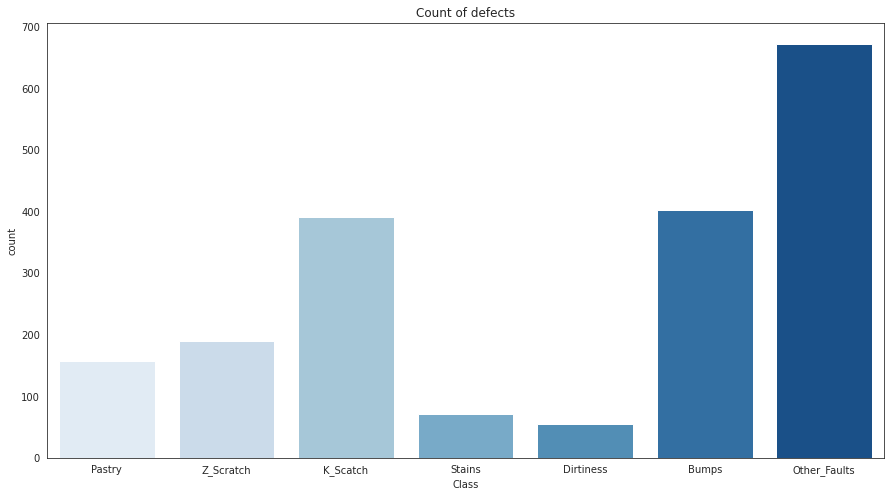

In [ ]:
sns.set_style('white')
plt.figure(figsize=(15,8))
count_plot = sns.countplot(data=steel, x="Class", palette='Blues').set_title('Count of defects')

In [ ]:
# Check correlation between feature variables 
corr = steel.corr()

display(corr)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


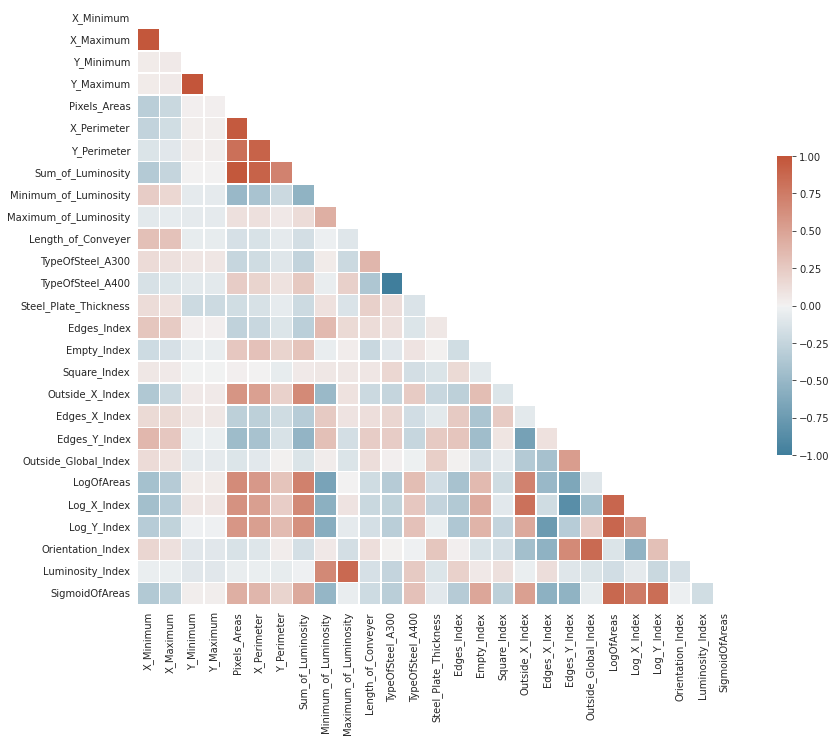

In [ ]:
# Visualize correlation

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Strongest correlation**


* Sum of Luminosity and Pixels Areas.
* Log of Areas and Sigmoid of Areas.
* Orientation Index and Outside Global Index.
* Edges Y Index and Outside Global Index.
* Maximum of Luminosity and Luminosity Index.

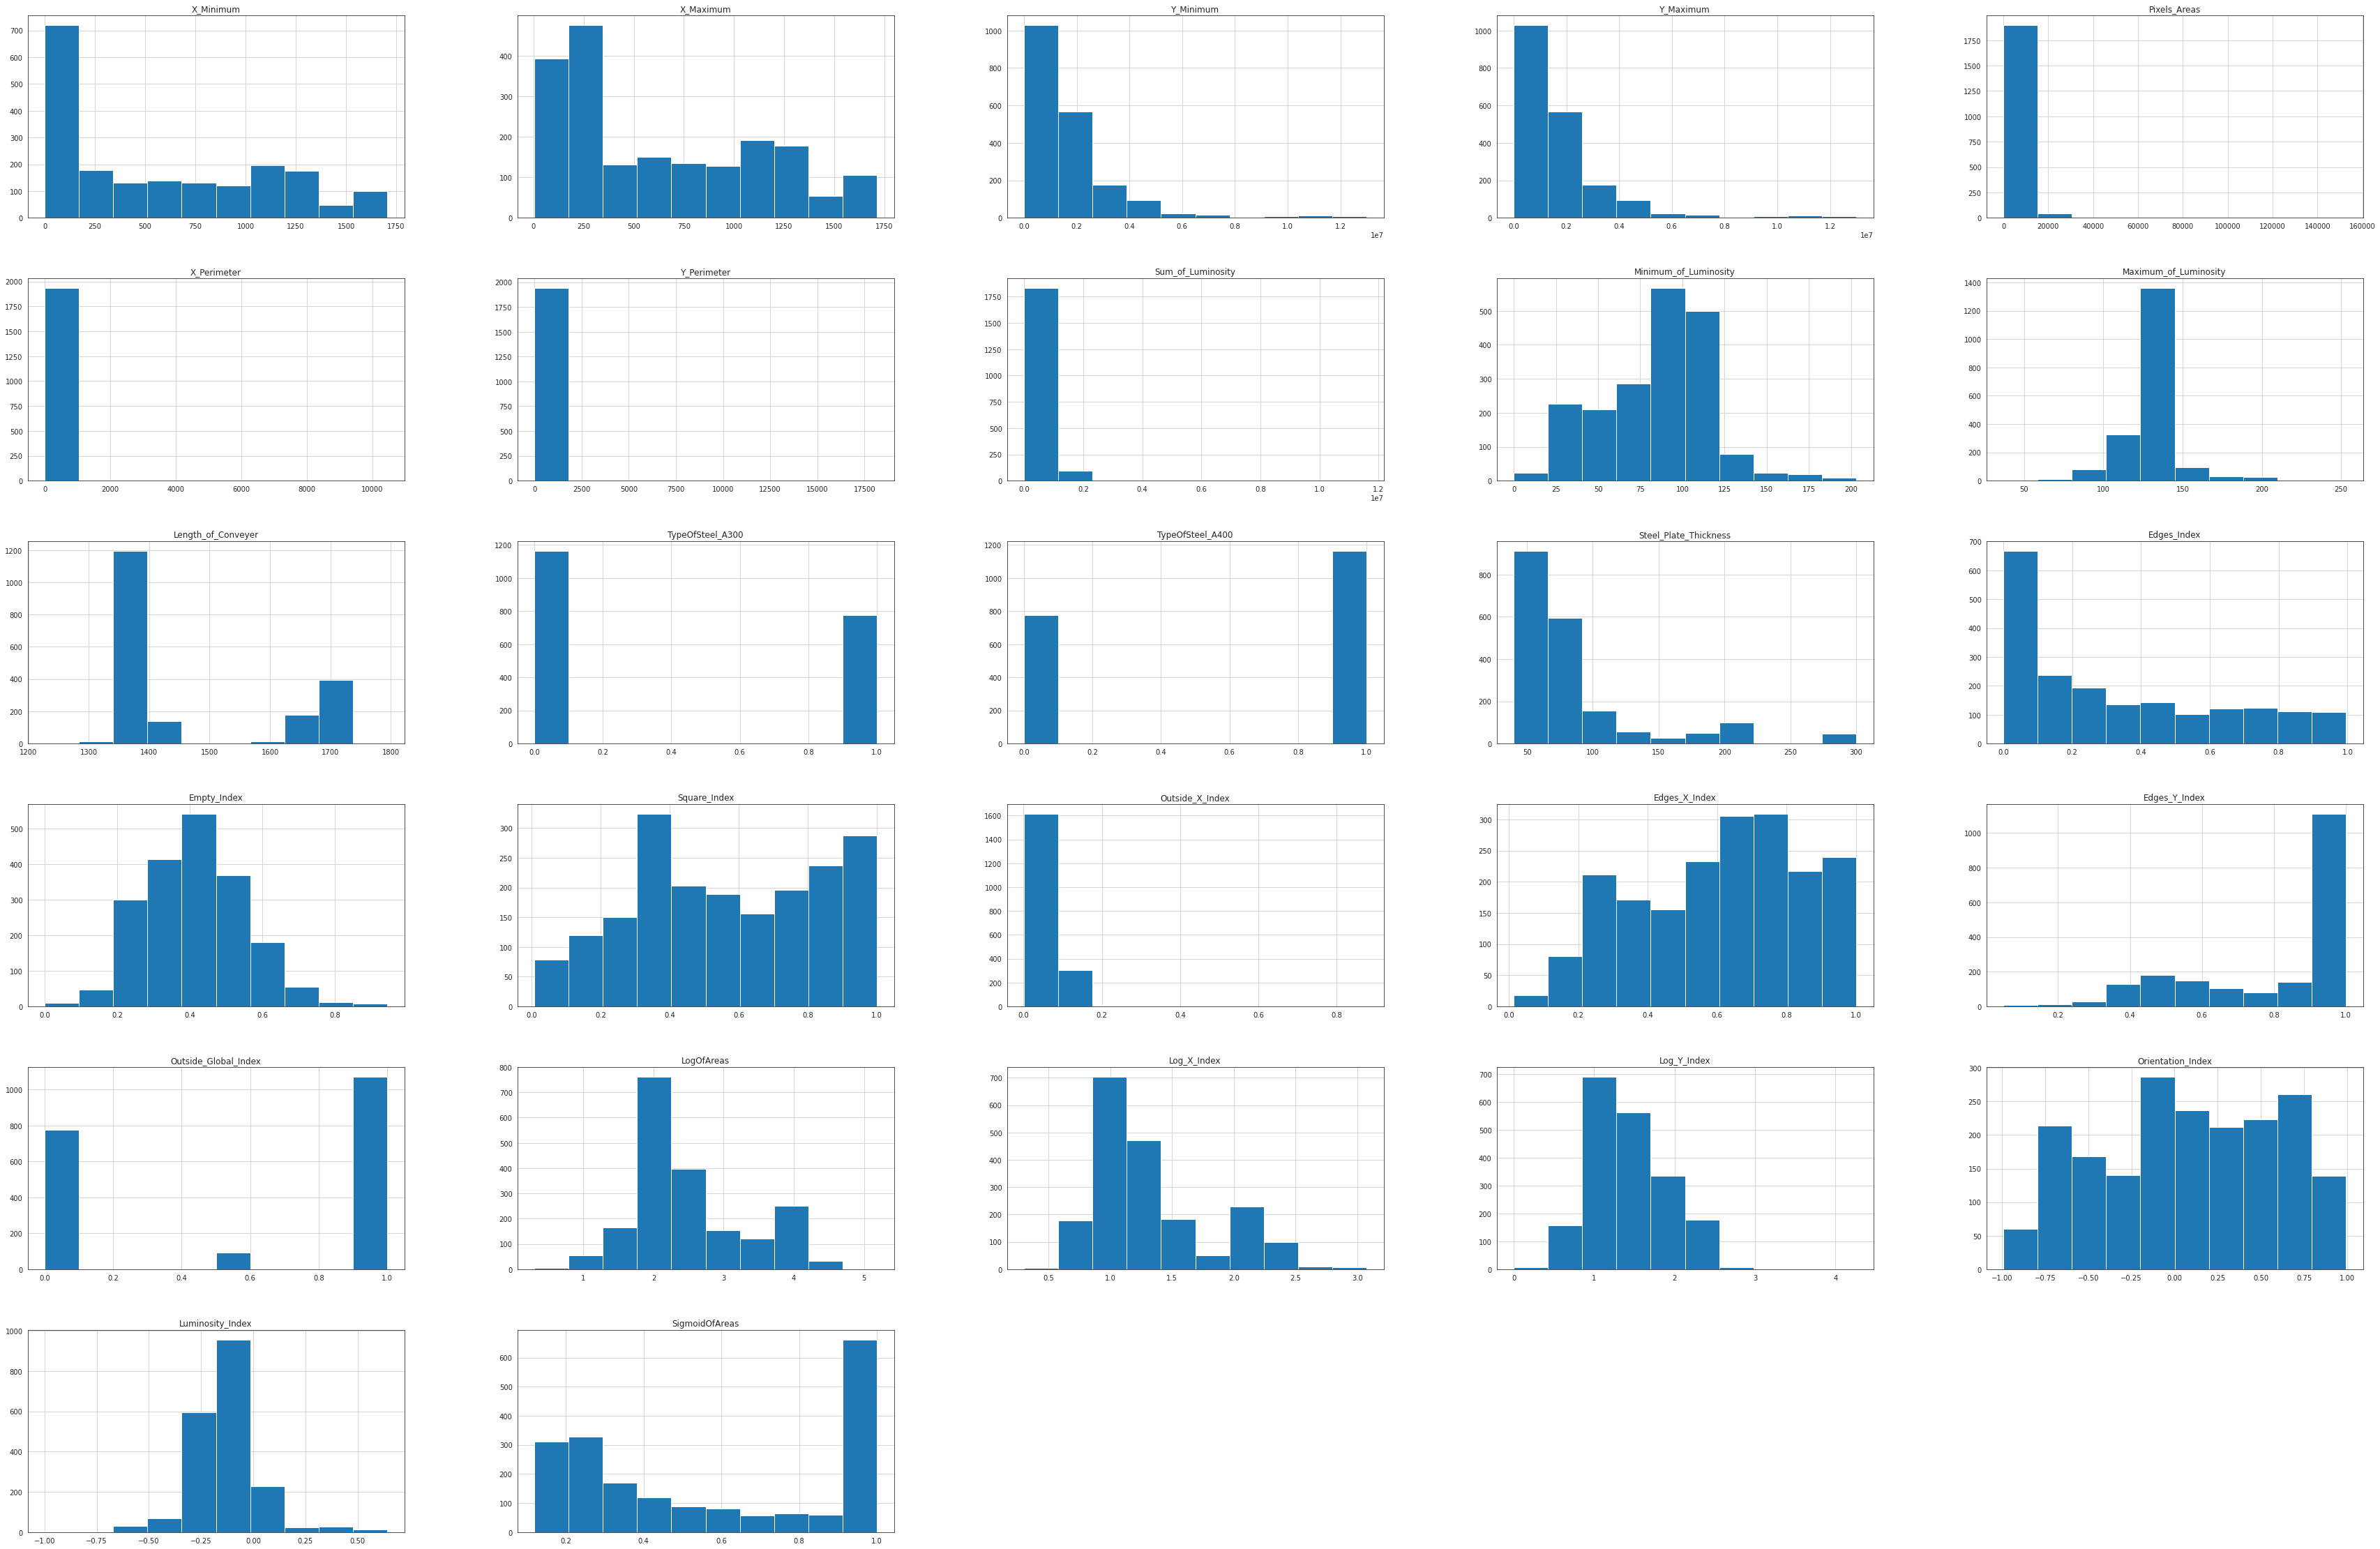

In [ ]:
hist_plot = steel.hist(figsize = (60,40))

### Model Development

In [ ]:
# Create feature and target dataset
X = steel.iloc[:,0:27] 
y = steel['Class']

# Scale feature variables 
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Split into train/test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [ ]:
def modelEval(model):
    '''
    Input: Model from RandomizedSearchCV
    Function: Trains the model, predicts on the test set
    Outputs: Prints the best parameters from the RandomizedSearchCV, the confusion matrix and the classification report
    '''
    model.fit(X_train, y_train)
    print("\nBest Parameters :",model.best_params_)
    predicted = model.predict(X_test)
    cMatrix = metrics.confusion_matrix(y_test, predicted)
    print("\n",cMatrix)
    print("\nModel Accuracy :", round(model.score(X_test, y_test)*100,3))
    print(metrics.classification_report(y_test, predicted))

In [ ]:
# Support Vector Machine
svm_ = SVC()

param_grid = {'C': [0.1, 1, 10, 100], 
                'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear','rbf']}

rs_svm = RandomizedSearchCV(svm_, param_grid, cv=10)

modelEval(rs_svm)


Best Parameters : {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}

 [[ 75   2   0  26   2   0   5]
 [  1  11   0   3   0   0   0]
 [  0   0 110  10   0   0   0]
 [ 33   3   2 159  10   1   7]
 [ 10   0   0  11  16   0   0]
 [  1   0   0   1   0  21   0]
 [  1   0   0   9   0   0  53]]

Model Accuracy : 76.329
              precision    recall  f1-score   support

       Bumps       0.62      0.68      0.65       110
   Dirtiness       0.69      0.73      0.71        15
    K_Scatch       0.98      0.92      0.95       120
Other_Faults       0.73      0.74      0.73       215
      Pastry       0.57      0.43      0.49        37
      Stains       0.95      0.91      0.93        23
   Z_Scratch       0.82      0.84      0.83        63

    accuracy                           0.76       583
   macro avg       0.77      0.75      0.76       583
weighted avg       0.77      0.76      0.76       583



In [ ]:
# Logistic Regression

lm = LogisticRegression()

param_grid = { 'penalty': ['l1','l2'],'C': [0.1,0.5,1,5,10], 'tol': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'solver': ['liblinear']}

rs_lm = RandomizedSearchCV(lm, param_grid, cv=10)

modelEval(rs_lm)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,



Best Parameters : {'tol': 0.001, 'solver': 'liblinear', 'penalty': 'l2', 'C': 0.5}

 [[ 64   0   1  40   2   0   3]
 [  1   5   0   8   1   0   0]
 [  0   0 111   7   1   1   0]
 [ 36   1   6 144  16   0  12]
 [  5   0   0  11  21   0   0]
 [  0   0   0   1   0  22   0]
 [  3   0   1   5   0   0  54]]

Model Accuracy : 72.213
              precision    recall  f1-score   support

       Bumps       0.59      0.58      0.58       110
   Dirtiness       0.83      0.33      0.48        15
    K_Scatch       0.93      0.93      0.93       120
Other_Faults       0.67      0.67      0.67       215
      Pastry       0.51      0.57      0.54        37
      Stains       0.96      0.96      0.96        23
   Z_Scratch       0.78      0.86      0.82        63

    accuracy                           0.72       583
   macro avg       0.75      0.70      0.71       583
weighted avg       0.72      0.72      0.72       583



In [ ]:
# Decision Tree

dt = DecisionTreeClassifier()

param_grid = { 'criterion': ['gini', 'entropy'],'min_samples_split':[10,15, 20] ,'max_depth': [None, 'auto', 'log2' ,'sqrt'], 'min_samples_leaf': [1,3,10,15], 'max_features': [None, 'auto','sqrt', 'log2' ]  }

rs_dt = RandomizedSearchCV(dt, param_grid, cv=10)

modelEval(rs_dt)


Best Parameters : {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}

 [[ 59   5   0  40   6   0   0]
 [  2  10   0   2   1   0   0]
 [  0   1 108   9   1   1   0]
 [ 41   8   8 143  13   0   2]
 [ 10   3   0   5  19   0   0]
 [  1   0   0   1   0  21   0]
 [  1   0   3   5   0   0  54]]

Model Accuracy : 71.012
              precision    recall  f1-score   support

       Bumps       0.52      0.54      0.53       110
   Dirtiness       0.37      0.67      0.48        15
    K_Scatch       0.91      0.90      0.90       120
Other_Faults       0.70      0.67      0.68       215
      Pastry       0.47      0.51      0.49        37
      Stains       0.95      0.91      0.93        23
   Z_Scratch       0.96      0.86      0.91        63

    accuracy                           0.71       583
   macro avg       0.70      0.72      0.70       583
weighted avg       0.72      0.71      0.72       583



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 305, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.wa

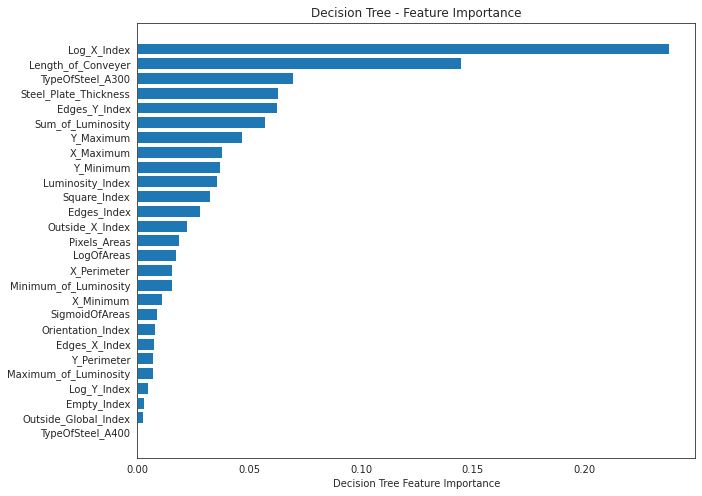

In [ ]:
# Feature importance - Decision Tree

dt = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=3, max_features='auto', max_depth=None, criterion='gini')
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

# Plot feature importance sorted
sorted_idx = dt.feature_importances_.argsort()
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], dt.feature_importances_[sorted_idx])
plt.xlabel('Decision Tree Feature Importance')
plt.title('Decision Tree - Feature Importance')
plt.show()

In [ ]:
# Random Forest 

rf = RandomForestClassifier()

param_grid = { 'n_estimators': [10,50,100,200],'criterion': ['gini', 'entropy'],'min_samples_split':[2,5,10,15] ,'max_depth': [None, 2], 'min_samples_leaf': [1,3,10,15], 'max_features': [None, 'auto','sqrt', 'log2' ]  }

rs_rf = RandomizedSearchCV(rf, param_grid, cv=10)

modelEval(rs_rf)


Best Parameters : {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}

 [[ 70   2   0  33   5   0   0]
 [  0  13   0   2   0   0   0]
 [  0   0 112   8   0   0   0]
 [ 32   2   1 166  10   0   4]
 [  4   0   0  17  16   0   0]
 [  1   0   0   1   0  21   0]
 [  1   0   3   6   0   0  53]]

Model Accuracy : 77.358
              precision    recall  f1-score   support

       Bumps       0.65      0.64      0.64       110
   Dirtiness       0.76      0.87      0.81        15
    K_Scatch       0.97      0.93      0.95       120
Other_Faults       0.71      0.77      0.74       215
      Pastry       0.52      0.43      0.47        37
      Stains       1.00      0.91      0.95        23
   Z_Scratch       0.93      0.84      0.88        63

    accuracy                           0.77       583
   macro avg       0.79      0.77      0.78       583
weighted avg       0.78      0.77      0.77       583



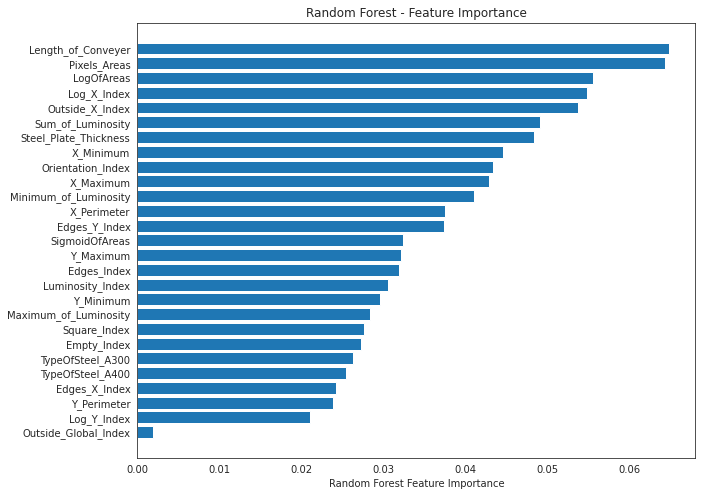

In [ ]:
# Feature importance - Random Forest

rf = RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=3, max_features='auto', max_depth=None, criterion='gini')
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)

# Plot feature importance sorted
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()

In [ ]:
# Naive Bayes

naive = GaussianNB()

naive.fit(X_train, y_train)
predicted = naive.predict(X_test)
print("\n",metrics.confusion_matrix(y_test, predicted))
print("\nModel Accuracy :", round(naive.score(X_test, y_test)*100,3))
print(metrics.classification_report(y_test, predicted))


 [[ 79   7   0   8  10   0   6]
 [  3   9   0   0   3   0   0]
 [  3   0 103  13   0   1   0]
 [ 81  12   9  66  39   1   7]
 [ 10   1   0   0  26   0   0]
 [  2   0   0   0   0  21   0]
 [  5   1   2   1   1   0  53]]

Model Accuracy : 61.235
              precision    recall  f1-score   support

       Bumps       0.43      0.72      0.54       110
   Dirtiness       0.30      0.60      0.40        15
    K_Scatch       0.90      0.86      0.88       120
Other_Faults       0.75      0.31      0.44       215
      Pastry       0.33      0.70      0.45        37
      Stains       0.91      0.91      0.91        23
   Z_Scratch       0.80      0.84      0.82        63

    accuracy                           0.61       583
   macro avg       0.63      0.71      0.63       583
weighted avg       0.70      0.61      0.61       583



In [ ]:
# KNN

knn = KNeighborsClassifier()
k = np.arange(1, 60)
param_grid = { 'n_neighbors': k, 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] }
rs_knn = RandomizedSearchCV(knn, param_grid, cv=10)

modelEval(rs_knn)


Best Parameters : {'weights': 'uniform', 'n_neighbors': 19, 'algorithm': 'brute'}

 [[ 75   3   0  25   0   0   7]
 [  4   5   0   5   1   0   0]
 [  0   0 110   9   0   1   0]
 [ 47   2   8 129  14   3  12]
 [ 15   0   0  10  12   0   0]
 [  1   0   0   0   0  22   0]
 [  2   0   1   6   0   0  54]]

Model Accuracy : 69.811
              precision    recall  f1-score   support

       Bumps       0.52      0.68      0.59       110
   Dirtiness       0.50      0.33      0.40        15
    K_Scatch       0.92      0.92      0.92       120
Other_Faults       0.70      0.60      0.65       215
      Pastry       0.44      0.32      0.38        37
      Stains       0.85      0.96      0.90        23
   Z_Scratch       0.74      0.86      0.79        63

    accuracy                           0.70       583
   macro avg       0.67      0.67      0.66       583
weighted avg       0.70      0.70      0.69       583



In [ ]:
# Bagging Classifier with Decision Tree as weak learner

bagclf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                          bootstrap=True, oob_score=True, random_state=42)

bagclf.fit(X_train, y_train)
predicted = bagclf.predict(X_test)
print("\n",metrics.confusion_matrix(y_test, predicted))
print("\nModel Accuracy :", round(bagclf.score(X_test, y_test)*100,3))
print(metrics.classification_report(y_test, predicted))



 [[ 70   2   0  33   5   0   0]
 [  1  12   0   2   0   0   0]
 [  0   0 114   6   0   0   0]
 [ 29   2   2 171  11   0   0]
 [  5   0   0  12  20   0   0]
 [  2   0   0   0   0  21   0]
 [  1   0   2   4   0   0  56]]

Model Accuracy : 79.588
              precision    recall  f1-score   support

       Bumps       0.65      0.64      0.64       110
   Dirtiness       0.75      0.80      0.77        15
    K_Scatch       0.97      0.95      0.96       120
Other_Faults       0.75      0.80      0.77       215
      Pastry       0.56      0.54      0.55        37
      Stains       1.00      0.91      0.95        23
   Z_Scratch       1.00      0.89      0.94        63

    accuracy                           0.80       583
   macro avg       0.81      0.79      0.80       583
weighted avg       0.80      0.80      0.80       583



### PCA

In [ ]:
# Fit the PCA such as we have n-components to explain 95% of the variance

pca_ = PCA(.95).fit(X_scaled)

In [ ]:
# Print out the explained variance and explained variance ratio for each principal component 

print(pca.explained_variance_, '\n')
print(pca.explained_variance_ratio_, '\n')
print('Number of principal components for 95% variance:', pca.n_components_)

[8.30757705 3.42185339 2.70527131 2.2390698  1.97251176 1.62451141
 1.37868818 1.0002279  0.92220626 0.78131583 0.71585682 0.54750756
 0.39335216] 

[0.30752952 0.12667002 0.10014361 0.08288579 0.07301835 0.06013609
 0.05103622 0.03702639 0.03413819 0.02892271 0.02649956 0.02026761
 0.01456109] 

Number of principal components for 95% variance: 13


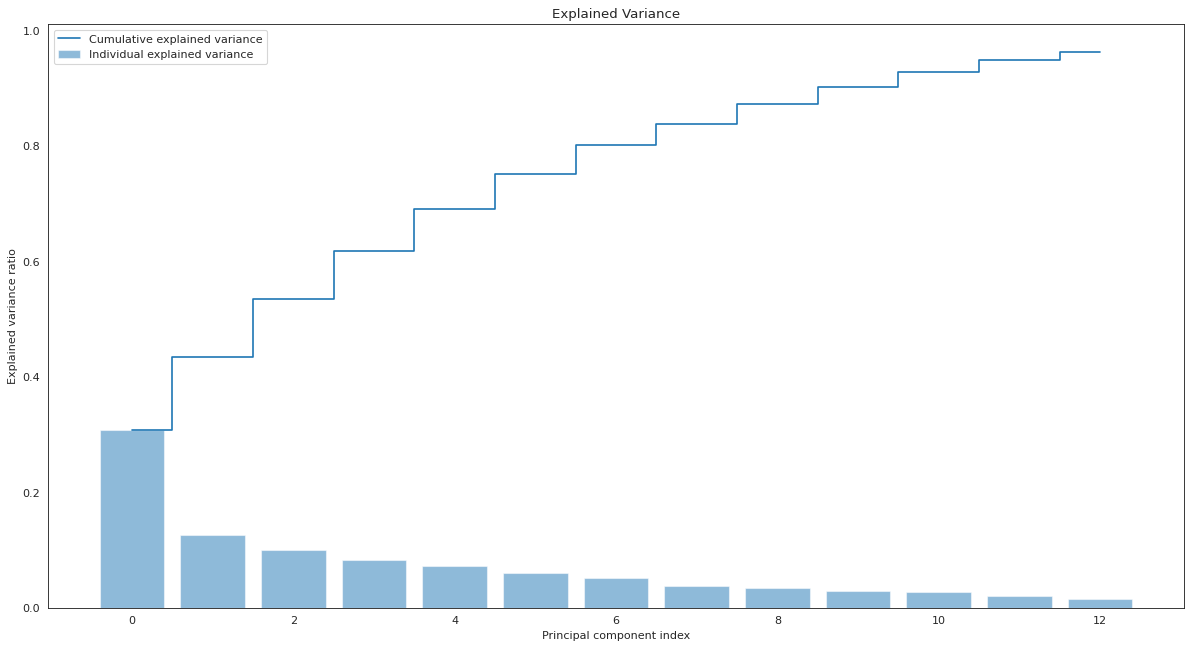

In [ ]:
# Transform features dataset
X_train_pca = PCA(n_components = 13).fit_transform(X_train)
X_test_pca = PCA(n_components = 13).fit_transform(X_test)

# Plot explained variance 
exp_var_pca = pca_.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize=(15, 8), dpi=80)
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha = 0.5, align='center', label='Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Explained Variance')
plt.show()

In [ ]:
def biplot(score, coeff, labels=None):
  '''
  Function creates a biplot for the first and second principal component
  '''
  xs = score[:,0]
  ys = score[:,1]
  n = coeff.shape[0]
  scalex = 1.0 / (xs.max() - xs.min())
  scaley = 1.0 / (ys.max() - ys.min())

  plt.scatter(xs * scalex, ys * scaley, c = 'lightblue')

  for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='b', alpha=0.5)
    if labels is None:
      plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, 'Var'+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1, 1)
  plt.ylim(-1, 1)
  plt.xlabel('PC{}'.format(1))
  plt.ylabel('PC{}'.format(2))
  plt.grid()

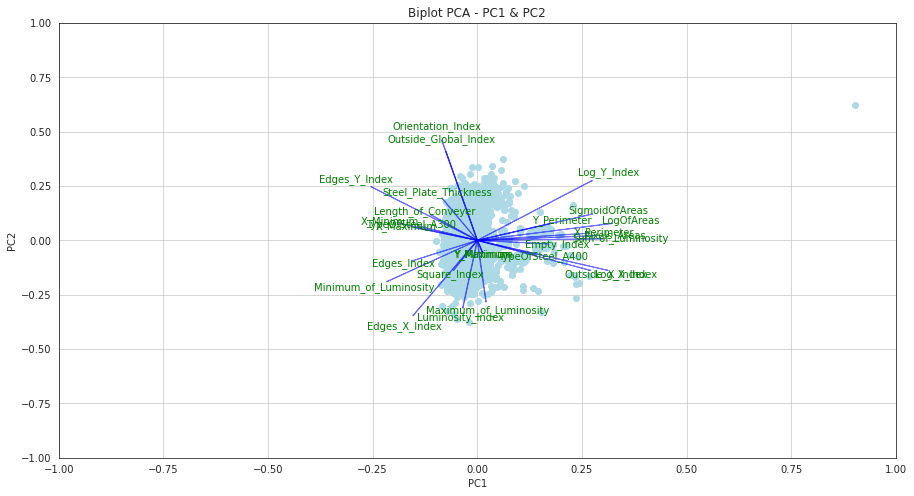

In [ ]:
pca_ = PCA(n_components=2)
X_pca = pca_.fit_transform(X_scaled)

plt.figure(figsize=(15,8))
plt.title('Biplot PCA - PC1 & PC2')
biplot(X_pca[:, 0:2], np.transpose(pca_.components_[0:2, :]), list(X.columns))
plt.show()

In [ ]:
from pca import pca


model = pca(n_components = 13)
out = model.fit_transform(X_scaled)

print(out['topfeat'])

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [27] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[13]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
      PC                feature   loading  type
0    PC1             LogOfAreas  0.319667  best
1    PC2      Orientation_Index  0.456961  best
2    PC3       Luminosity_Index  0.391506  best
3    PC4            Y_Perimeter  0.486601  best
4    PC5              Y_Minimum  0.589392  best
5    PC6              X_Maximum -0.601484  best
6    PC7            Empty_Index -0.468543  best
7    PC8           Square_Index -0.459978  best
8    PC9           Square_Index -0.572198  best
9   PC10            Edges_Index  0.711232  best
10  PC11            Edges_Index  0.625693  best
11  PC12     Length_of_Conveyer -0.664811  best
12  PC13        Outside_X_Ind

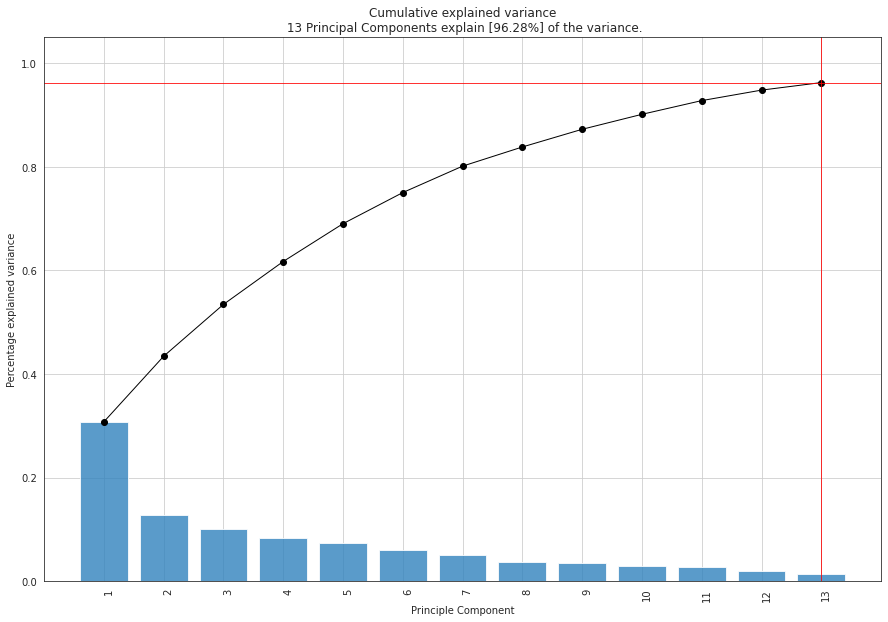

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb275c942d0>)

<Figure size 432x288 with 0 Axes>

In [ ]:
model.plot()

### Model Development - PCA

In [ ]:
def PCAmodelEval(model):
    '''
    Input: Model from RandomizedSearchCV. Uses the reduced dataset
    Function: Trains the model, predicts on the test set
    Outputs: Prints the best parameters from the RandomizedSearchCV, the confusion matrix and the classification report
    '''
    model.fit(X_train_pca, y_train)
    print("\nBest Parameters :",model.best_params_)
    predicted = model.predict(X_test_pca)
    cMatrix = metrics.confusion_matrix(y_test, predicted)
    print("\n",cMatrix)
    print("\nModel Accuracy :", round(model.score(X_test_pca,y_test)*100,3))
    print(metrics.classification_report(y_test, predicted))

In [ ]:
# Support Vector Machine
svm_ = SVC()

param_grid = {'C': [0.1, 1, 10, 100], 
                'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear','rbf']}

rs_svm = RandomizedSearchCV(svm_, param_grid, cv=10)
PCAmodelEval(rs_svm)

In [ ]:
# Logistic Regression

lm = LogisticRegression()

param_grid = { 'penalty': ['l1','l2'],'C': [0.1,0.5,1,5,10], 'tol': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'solver': ['liblinear']}

rs_lm = RandomizedSearchCV(lm, param_grid, cv=10)

PCAmodelEval(rs_lm)


Best Parameters : {'tol': 0.001, 'solver': 'liblinear', 'penalty': 'l2', 'C': 10}

 [[46  1  2 40  7  8  6]
 [ 0  1  0 12  0  2  0]
 [ 5  0 87 25  0  2  1]
 [62  6  4 97 22  9 15]
 [ 2  4  0 20  3  3  5]
 [21  0  0  2  0  0  0]
 [26  2  1 11  5  0 18]]

Model Accuracy : 43.225
              precision    recall  f1-score   support

       Bumps       0.28      0.42      0.34       110
   Dirtiness       0.07      0.07      0.07        15
    K_Scatch       0.93      0.72      0.81       120
Other_Faults       0.47      0.45      0.46       215
      Pastry       0.08      0.08      0.08        37
      Stains       0.00      0.00      0.00        23
   Z_Scratch       0.40      0.29      0.33        63

    accuracy                           0.43       583
   macro avg       0.32      0.29      0.30       583
weighted avg       0.47      0.43      0.44       583



In [ ]:
# Decision Tree

dt = DecisionTreeClassifier()

param_grid = { 'criterion': ['gini', 'entropy'],'min_samples_split':[10,15, 20] ,'max_depth': [None, 'auto', 'log2' ,'sqrt'], 'min_samples_leaf': [1,3,10,15], 'max_features': [None, 'auto','sqrt', 'log2' ]  }

rs_dt = RandomizedSearchCV(dt, param_grid, cv=10)

PCAmodelEval(rs_dt)


Best Parameters : {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}

 [[33  1 15 43 12  0  6]
 [ 2  0  1 11  1  0  0]
 [25  0 69 23  2  0  1]
 [81  8 16 86 21  1  2]
 [ 9  6  1  8 11  0  2]
 [ 8  1  3 11  0  0  0]
 [18  2  9 20  1  0 13]]

Model Accuracy : 36.364
              precision    recall  f1-score   support

       Bumps       0.19      0.30      0.23       110
   Dirtiness       0.00      0.00      0.00        15
    K_Scatch       0.61      0.57      0.59       120
Other_Faults       0.43      0.40      0.41       215
      Pastry       0.23      0.30      0.26        37
      Stains       0.00      0.00      0.00        23
   Z_Scratch       0.54      0.21      0.30        63

    accuracy                           0.36       583
   macro avg       0.28      0.25      0.26       583
weighted avg       0.39      0.36      0.37       583



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 305, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.wa

In [ ]:
# Random Forest 

rf = RandomForestClassifier()

param_grid = { 'n_estimators': [10,50,100,200],'criterion': ['gini', 'entropy'],'min_samples_split':[2,5,10,15] ,'max_depth': [None, 2], 'min_samples_leaf': [1,3,10,15], 'max_features': [None, 'auto','sqrt', 'log2' ]  }

rs_rf = RandomizedSearchCV(rf, param_grid, cv=10)

PCAmodelEval(rs_rf)


Best Parameters : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}

 [[ 40   0   0  65   0   0   5]
 [  0   0   0  14   1   0   0]
 [  0   0  97  21   0   2   0]
 [ 29   1   2 169  11   0   3]
 [  3   2   0  30   2   0   0]
 [  0   0   1  22   0   0   0]
 [ 17   0   2  29   1   0  14]]

Model Accuracy : 55.232
              precision    recall  f1-score   support

       Bumps       0.45      0.36      0.40       110
   Dirtiness       0.00      0.00      0.00        15
    K_Scatch       0.95      0.81      0.87       120
Other_Faults       0.48      0.79      0.60       215
      Pastry       0.13      0.05      0.08        37
      Stains       0.00      0.00      0.00        23
   Z_Scratch       0.64      0.22      0.33        63

    accuracy                           0.55       583
   macro avg       0.38      0.32      0.33       583
weighted avg       0.54      0.55      0.52       583



In [ ]:
# Naive Bayes

naive = GaussianNB()

naive.fit(X_train_pca, y_train)
predicted = naive.predict(X_test_pca)
print("\n",metrics.confusion_matrix(y_test, predicted))
print("\nModel Accuracy :", round(naive.score(X_test_pca, y_test)*100,3))
print(metrics.classification_report(y_test, predicted))


 [[ 63   0   6  33   2   0   6]
 [  2   1   0   9   2   0   1]
 [  0   0 100  20   0   0   0]
 [ 45   2  16 130  14   0   8]
 [  8   2   1  24   1   0   1]
 [  8   0   4  11   0   0   0]
 [ 29   2   4   6   2   0  20]]

Model Accuracy : 54.031
              precision    recall  f1-score   support

       Bumps       0.41      0.57      0.48       110
   Dirtiness       0.14      0.07      0.09        15
    K_Scatch       0.76      0.83      0.80       120
Other_Faults       0.56      0.60      0.58       215
      Pastry       0.05      0.03      0.03        37
      Stains       0.00      0.00      0.00        23
   Z_Scratch       0.56      0.32      0.40        63

    accuracy                           0.54       583
   macro avg       0.35      0.35      0.34       583
weighted avg       0.51      0.54      0.52       583



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# KNN

knn = KNeighborsClassifier()
k = np.arange(1, 60)
param_grid = { 'n_neighbors': k, 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] }
rs_knn = RandomizedSearchCV(knn, param_grid, cv=10)

PCAmodelEval(rs_knn)


Best Parameters : {'weights': 'distance', 'n_neighbors': 8, 'algorithm': 'brute'}

 [[53  0  3 29  1  3 21]
 [ 1  7  0  3  3  0  1]
 [ 3  0 99 10  0  8  0]
 [62  5  7 98 19  1 23]
 [13  3  0 10  4  0  7]
 [ 3  0  1  8  0 11  0]
 [22  1  3  7  1  0 29]]

Model Accuracy : 51.63
              precision    recall  f1-score   support

       Bumps       0.34      0.48      0.40       110
   Dirtiness       0.44      0.47      0.45        15
    K_Scatch       0.88      0.82      0.85       120
Other_Faults       0.59      0.46      0.52       215
      Pastry       0.14      0.11      0.12        37
      Stains       0.48      0.48      0.48        23
   Z_Scratch       0.36      0.46      0.40        63

    accuracy                           0.52       583
   macro avg       0.46      0.47      0.46       583
weighted avg       0.54      0.52      0.52       583



In [ ]:
# Bagging Classifier with Decision Tree as weak learner

bagclf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                          bootstrap=True, oob_score=True, random_state=42)

bagclf.fit(X_train_pca, y_train)
predicted = bagclf.predict(X_test_pca)
print("\n",metrics.confusion_matrix(y_test, predicted))
print("\nModel Accuracy :", round(bagclf.score(X_test_pca, y_test)*100,3))
print(metrics.classification_report(y_test, predicted))



 [[ 32   0   2  70   0   3   3]
 [  2   0   0  12   1   0   0]
 [  1   0 100  17   0   2   0]
 [ 34   1   2 169   6   1   2]
 [  5   5   0  26   0   1   0]
 [  0   0   9   8   0   6   0]
 [ 19   1   1  31   2   0   9]]

Model Accuracy : 54.202
              precision    recall  f1-score   support

       Bumps       0.34      0.29      0.32       110
   Dirtiness       0.00      0.00      0.00        15
    K_Scatch       0.88      0.83      0.85       120
Other_Faults       0.51      0.79      0.62       215
      Pastry       0.00      0.00      0.00        37
      Stains       0.46      0.26      0.33        23
   Z_Scratch       0.64      0.14      0.23        63

    accuracy                           0.54       583
   macro avg       0.40      0.33      0.34       583
weighted avg       0.52      0.54      0.50       583

